In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(repr) 
library(skimr) 
library(ggridges)
library(grid)
library(gridExtra)
library(ggcorrplot)

options(repr.plot.width=14, repr.plot.height = 8)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/palmer-archipelago-antarctica-penguin-data")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[1] "penguins_lter.csv" "penguins_size.csv"

# What's the dataset?
> The penguins dataset contains size measurements for three penguin species (Adelie, Chinstrap, and Gentoo) that live on the Palmer Archipelago in Antarctica. 

In [2]:
penguins <- read_csv("../input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv")
head(penguins)


── Column specification ────────────────────────────────────────────────────────
cols(
  studyName = col_character(),
  `Sample Number` = col_double(),
  Species = col_character(),
  Region = col_character(),
  Island = col_character(),
  Stage = col_character(),
  `Individual ID` = col_character(),
  `Clutch Completion` = col_character(),
  `Date Egg` = col_character(),
  `Culmen Length (mm)` = col_double(),
  `Culmen Depth (mm)` = col_double(),
  `Flipper Length (mm)` = col_double(),
  `Body Mass (g)` = col_double(),
  Sex = col_character(),
  `Delta 15 N (o/oo)` = col_double(),
  `Delta 13 C (o/oo)` = col_double(),
  Comments = col_character()
)




studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NA,NA,NA,NA,NA,NA,NA,Adult not sampled.
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NA
PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190,3650,MALE,8.66496,-25.29805,NA


* The data has species on islands, with 4 body measurements. 
* There are spaces and parantheses in the column names. They could be tidied up using the rename() function.

# Skim the Data

In [3]:
skim_without_charts(penguins)

── Data Summary ────────────────────────
                           Values  
Name                       penguins
Number of rows             344     
Number of columns          17      
_______________________            
Column type frequency:             
  character                10      
  numeric                  7       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
   skim_variable     n_missing complete_rate   min   max empty n_unique
 1 studyName                 0        1          7     7     0        3
 2 Species                   0        1         33    41     0        3
 3 Region                    0        1          6     6     0        1
 4 Island                    0        1          5     9     0        3
 5 Stage                     0        1         18    18     0        1
 6 Individual ID             0        1          4     6     0      190
 7 Clutch Com

***10 rows are missing a value for Sex and 2 rows are missing a value for body measurements.***
* There are 3 unique islands
* There are 3 unique species
* There are 3 unique values for sex

In [4]:
penguins %>% 
  group_by(Species) %>% 
  summarize(across(where(is.numeric), mean, na.rm = TRUE))

Species,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie Penguin (Pygoscelis adeliae),76.5,38.79139,18.34636,189.9536,3700.662,8.859733,-25.80419
Chinstrap penguin (Pygoscelis antarctica),34.5,48.83382,18.42059,195.8235,3733.088,9.356155,-24.54654
Gentoo penguin (Pygoscelis papua),62.5,47.50488,14.98211,217.1870,5076.016,8.245338,-26.18530


In [5]:
penguins %>% 
  count(Species)

Species,n
<chr>,<int>
Adelie Penguin (Pygoscelis adeliae),152
Chinstrap penguin (Pygoscelis antarctica),68
Gentoo penguin (Pygoscelis papua),124


**What is a culmen?**
 



![Culmen ~ Bill](https://cran.r-project.org/web/packages/palmerpenguins/readme/man/figures/culmen_depth.png)
[Dataset Readme ](https://cran.r-project.org/web/packages/palmerpenguins/readme/)


# Explore the frequencies

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


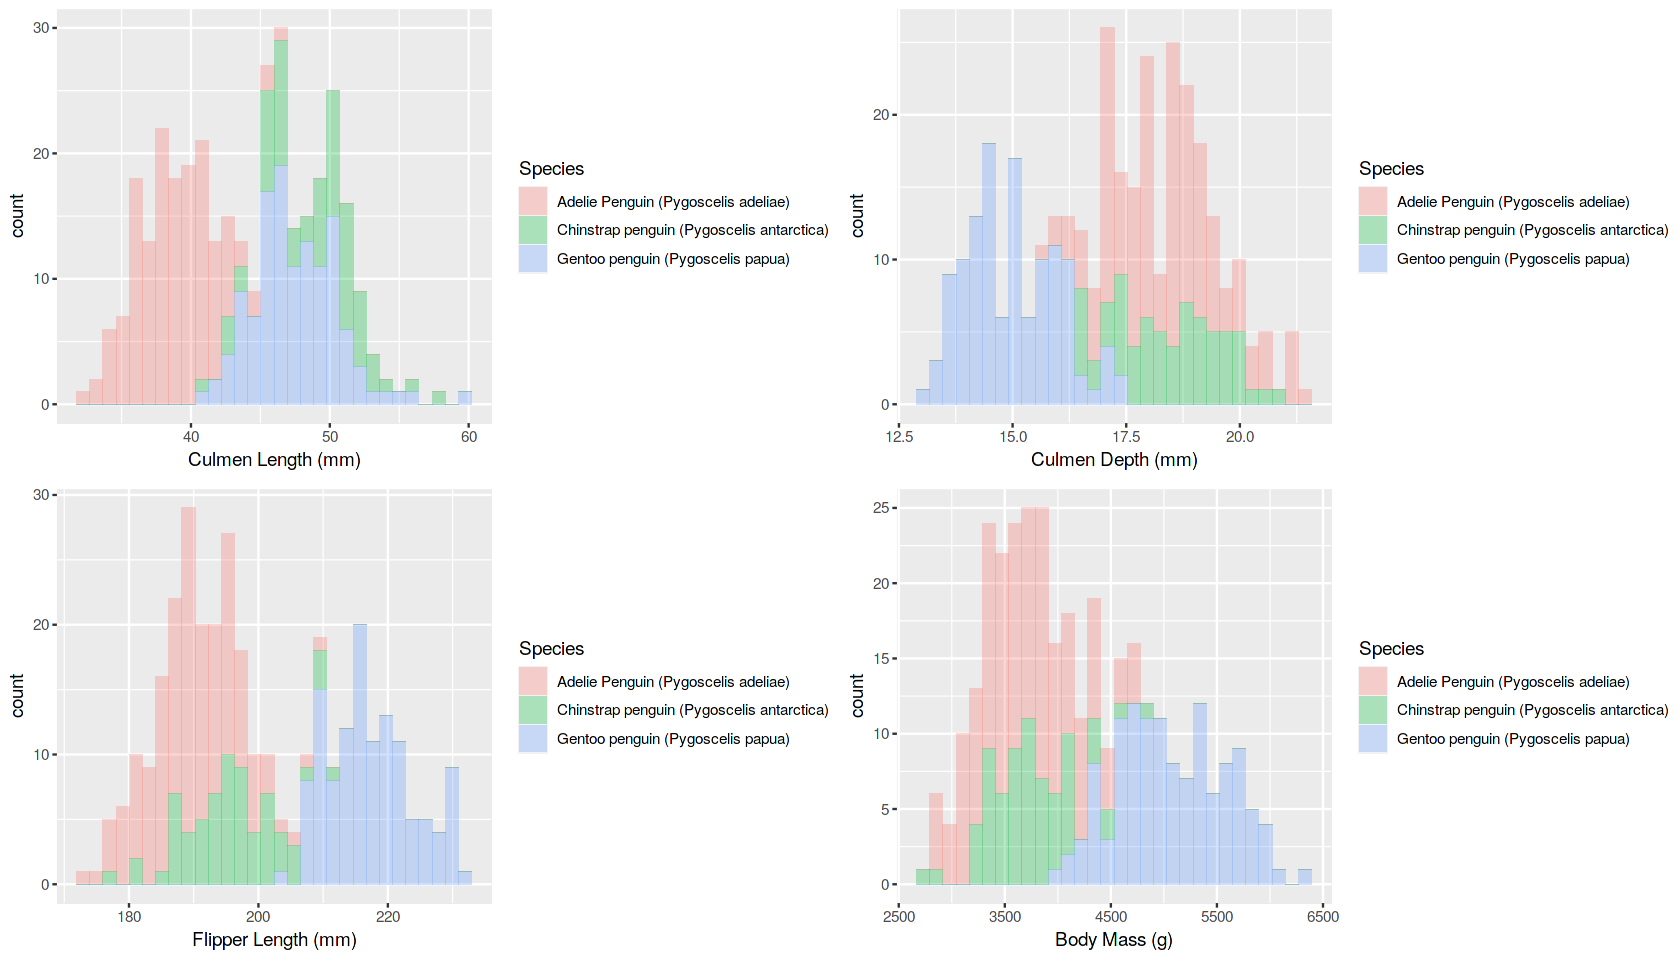

In [6]:
hist_cl <- ggplot(data = penguins, aes(x=`Culmen Length (mm)`))+ 
                  geom_histogram(alpha=.3, aes(fill=Species))
                  
hist_cd <- ggplot(data = penguins, aes(x=`Culmen Depth (mm)`))+ 
                  geom_histogram(alpha=.3, aes(fill=Species))
                  
hist_fl <- ggplot(data = penguins, aes(x=`Flipper Length (mm)`))+ 
                  geom_histogram(alpha=.3, aes(fill=Species))
                  
hist_bm <- ggplot(data = penguins, aes(x=`Body Mass (g)`))+ 
                  geom_histogram(alpha=.3, aes(fill=Species))

grid.arrange(hist_cl,hist_cd,hist_fl,hist_bm, nrow = 2)

The number of data points for each of the species is different.   
Therefore, adding a density plot for each specie on top of this histogram, will be untidy. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


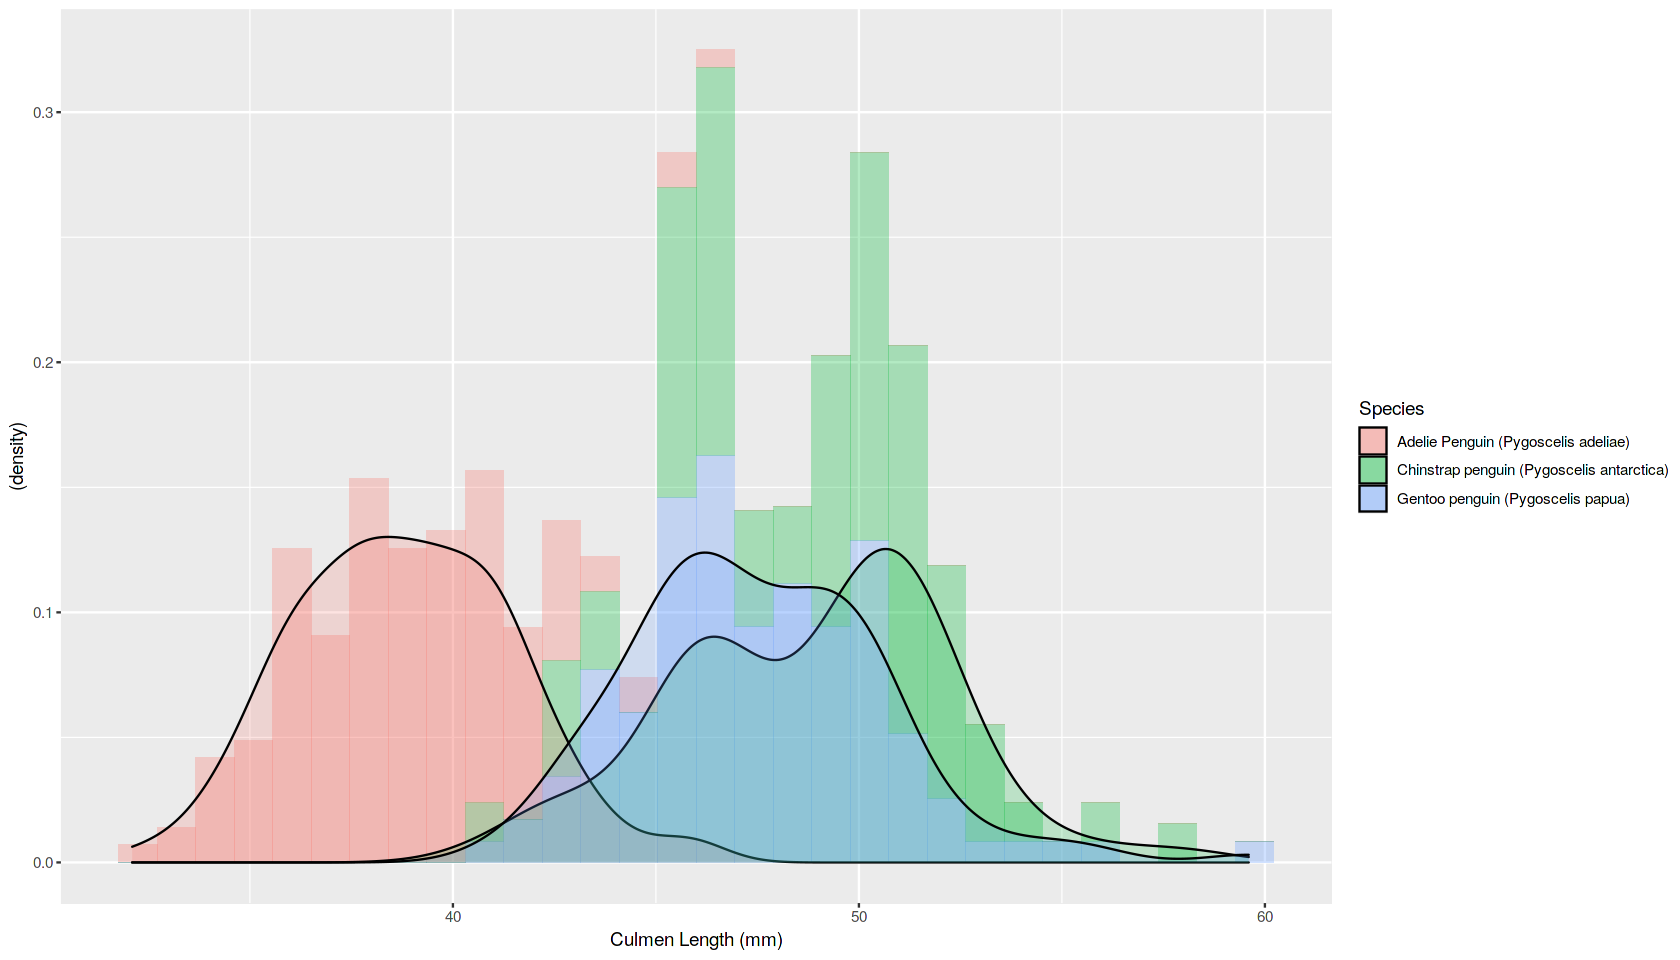

In [7]:
hist_cl + aes(y=(..density..), group = Species,fill=Species)+
 geom_density(alpha=.2) 

Use Ridgeline plots. The partially overlapping line plots that create the impression of a mountain range. The density will now be staggered vertically. 

Picking joint bandwidth of 1.08

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 0.382

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 2.38

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 153

Warning message:
“Removed 2 rows containing non-finite values (stat_density_ridges).”


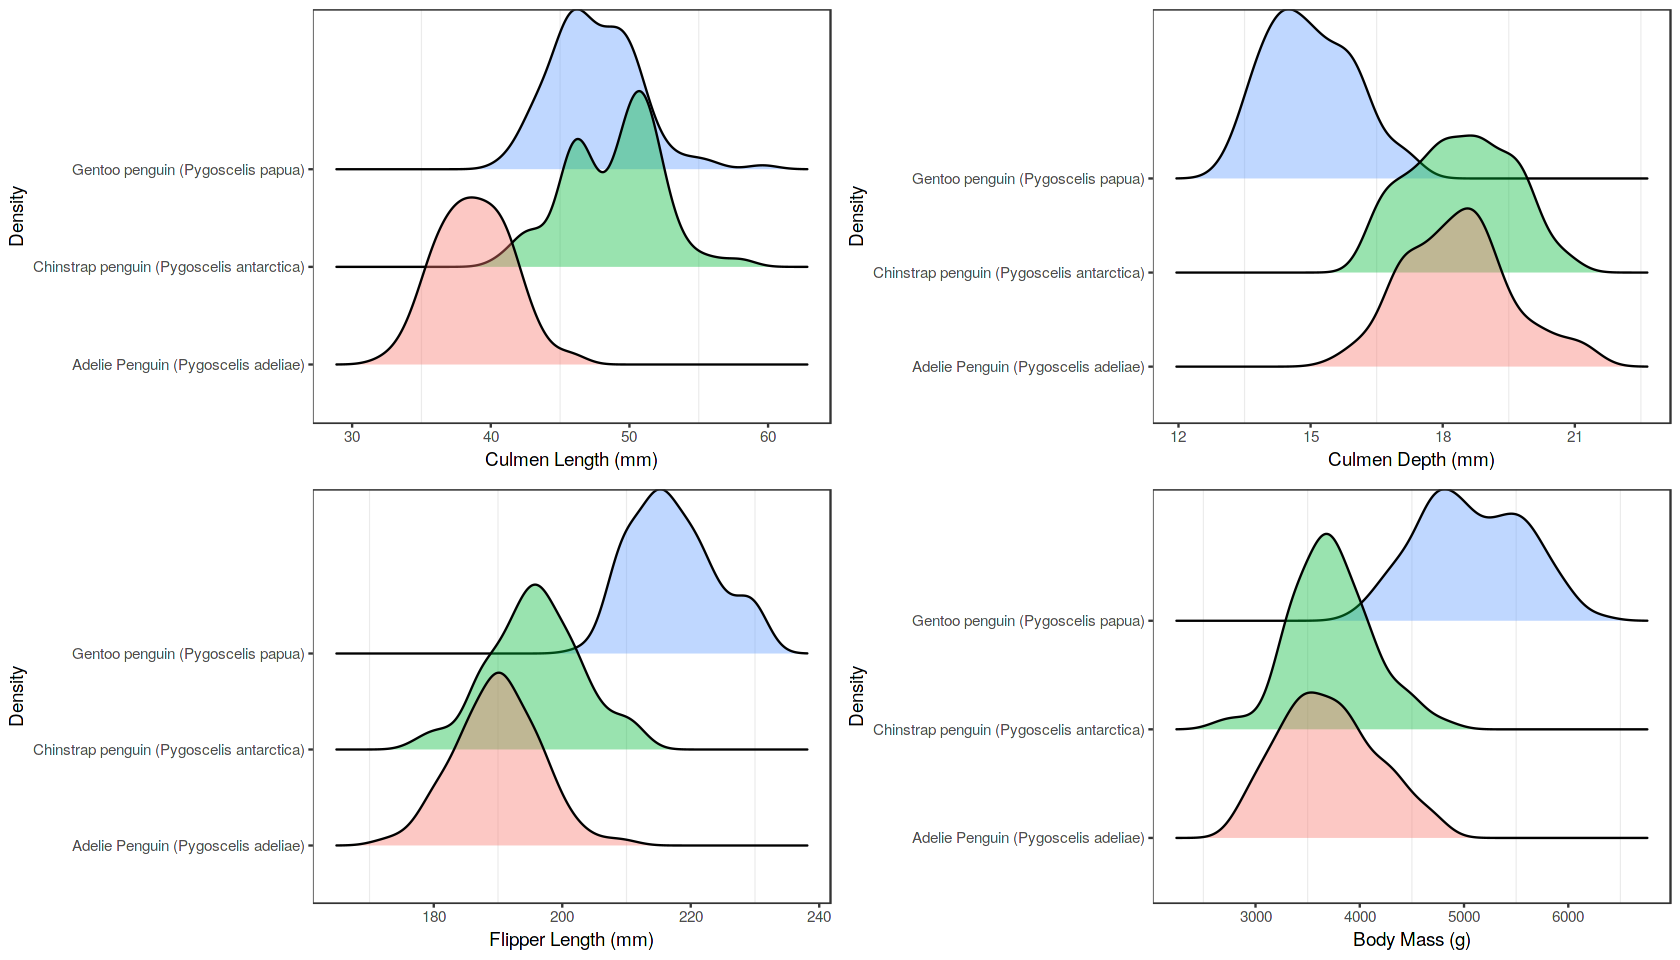

In [8]:
hist_cl <- ggplot(data = penguins, aes(x=`Culmen Length (mm)`,y= Species))+ 
                  geom_density_ridges(alpha=.4, aes(fill=Species))+
                  theme_bw() + 
                    ylab("Density")+
                  theme(panel.grid.major = element_blank(),     #Background is white
                        legend.position = "none")    

hist_cd <- ggplot(data = penguins, aes(x=`Culmen Depth (mm)`,y= Species))+ 
                  geom_density_ridges(alpha=.4, aes(fill=Species))+
                  theme_bw() + 
                 ylab("Density") + 
                  theme(panel.grid.major = element_blank(),     #Background is white
                        legend.position = "none")   
                  
hist_fl <- ggplot(data = penguins, aes(x=`Flipper Length (mm)`,y= Species))+ 
                  geom_density_ridges(alpha=.4, aes(fill=Species))+
                  theme_bw() +  
                    ylab("Density") +
                  theme(panel.grid.major = element_blank(),     #Background is white
                        legend.position = "none")   
                  
hist_bm <- ggplot(data = penguins, aes(x=`Body Mass (g)`,y= Species))+ 
                  geom_density_ridges(alpha=.4, aes(fill=Species))+
                  theme_bw() +  
                ylab("Density") +
                  theme(panel.grid.major = element_blank(),     #Background is white
                        legend.position = "none")   

grid.arrange(hist_cl,hist_cd,hist_fl,hist_bm, nrow = 2)

# Plotting Relationships
> Plot the relationship between body mass and flipper length in the three penguin species

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


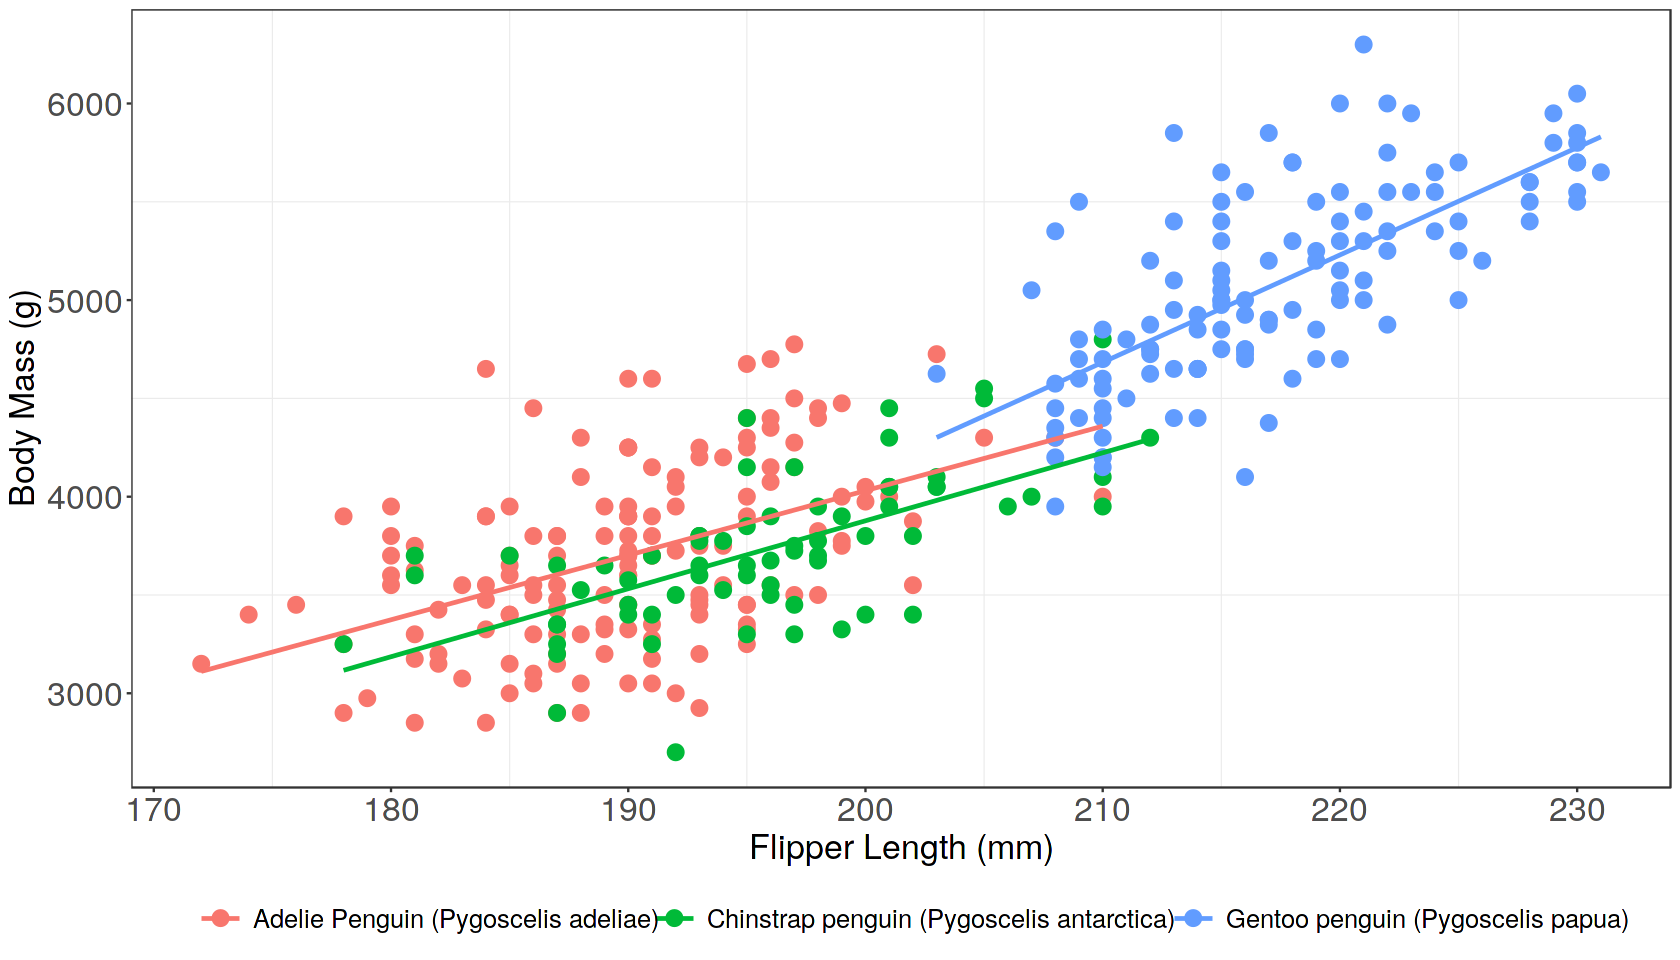

In [9]:
ggplot(data = penguins, aes(x=`Flipper Length (mm)`,y=`Body Mass (g)`, color = Species))+
    geom_point(size=4) +
    geom_smooth(method = "lm", se = FALSE) +
    theme_bw() + 
    theme(panel.grid.major = element_blank(),     #Background is white
          axis.text = element_text(size = 20),
          axis.title = element_text(size = 20),
          legend.text = element_text(size =15),
          legend.position = "bottom",
          legend.title = element_blank(),
          legend.key.size = unit(1,"cm"))

The plot shows a **positive relationship** between the two variables.   
The larger the penguin, the longer the flipper.  
Using **facet_wrap** to see the relationship for each of the species separately.   
Also look at the body mass and flipper length difference for each gender.  


Warning message:
“Removed 2 rows containing missing values (geom_point).”


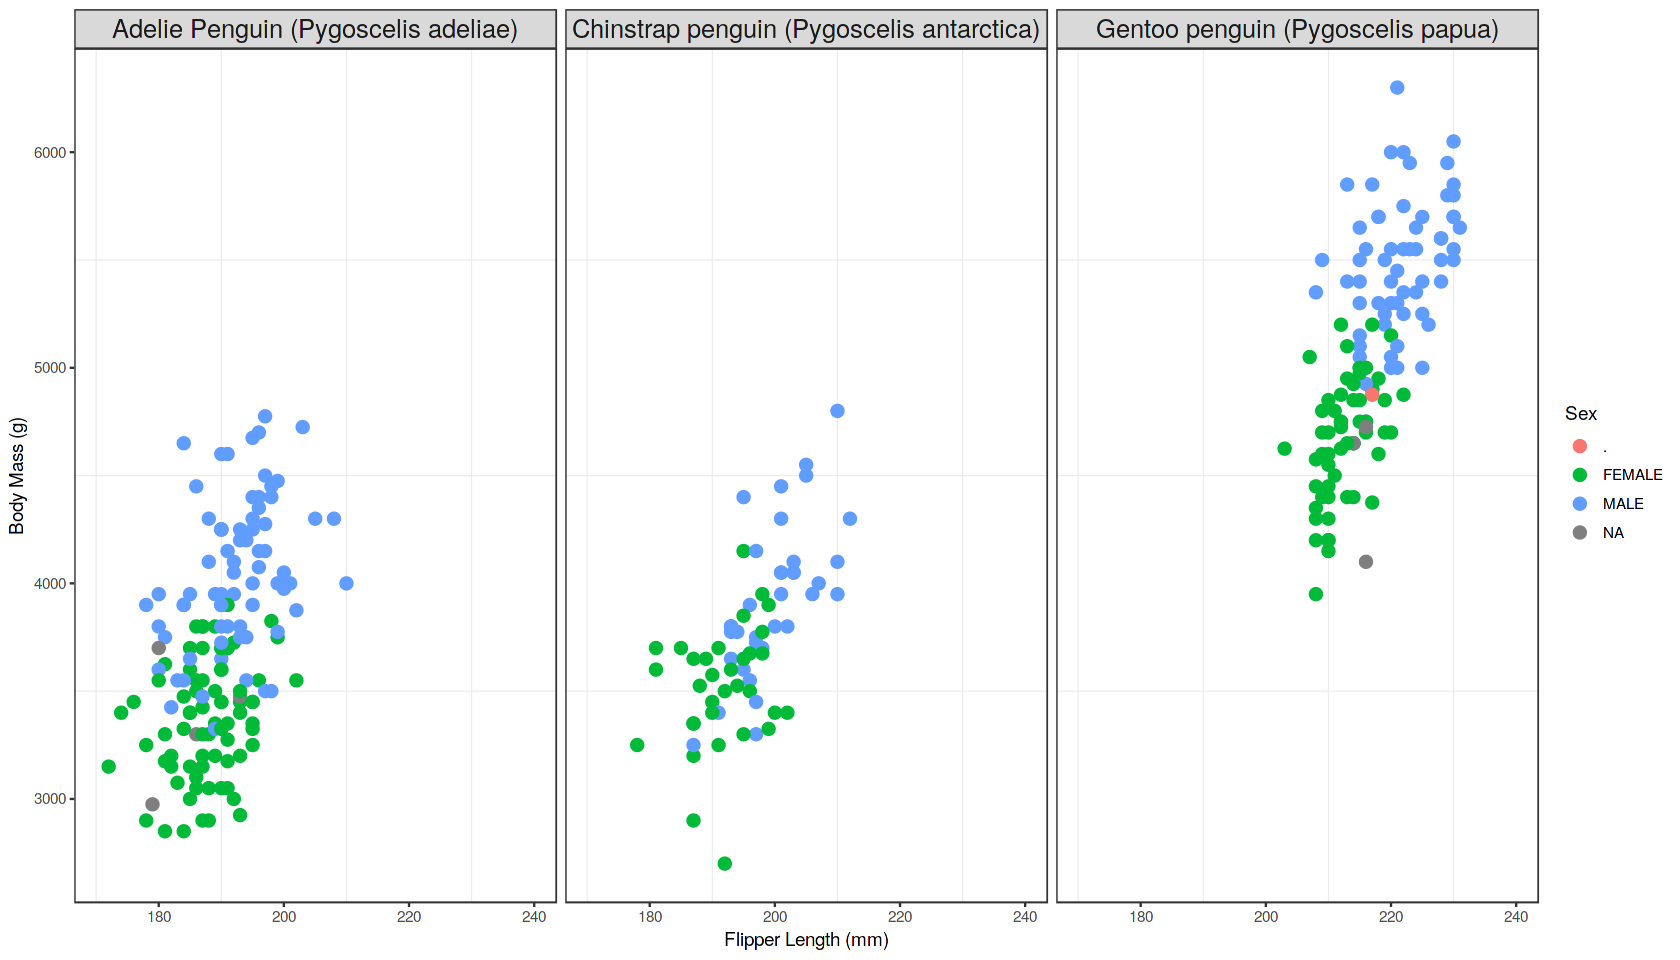

In [10]:
ggplot(data = penguins, aes(x=`Flipper Length (mm)`,y=`Body Mass (g)`, color = Sex))+
    geom_point(size=3)+
    facet_wrap(~Species)+
    xlim(170, 240) +                         #Keep the x axis range the same for all facets
    theme_bw() + 
    theme(panel.grid.major = element_blank(),#Make background white
         strip.text = element_text(size=15))

The legend shows that there are missing or NA values for Sex.   
These can be imputed or filtered out, depending on their frequency. 

In [11]:
table(penguins$Sex)


     . FEMALE   MALE 
     1    165    168 

> Plot the relationship between bill length and bill depth, for Male and Female Sexes

`geom_smooth()` using formula 'y ~ x'



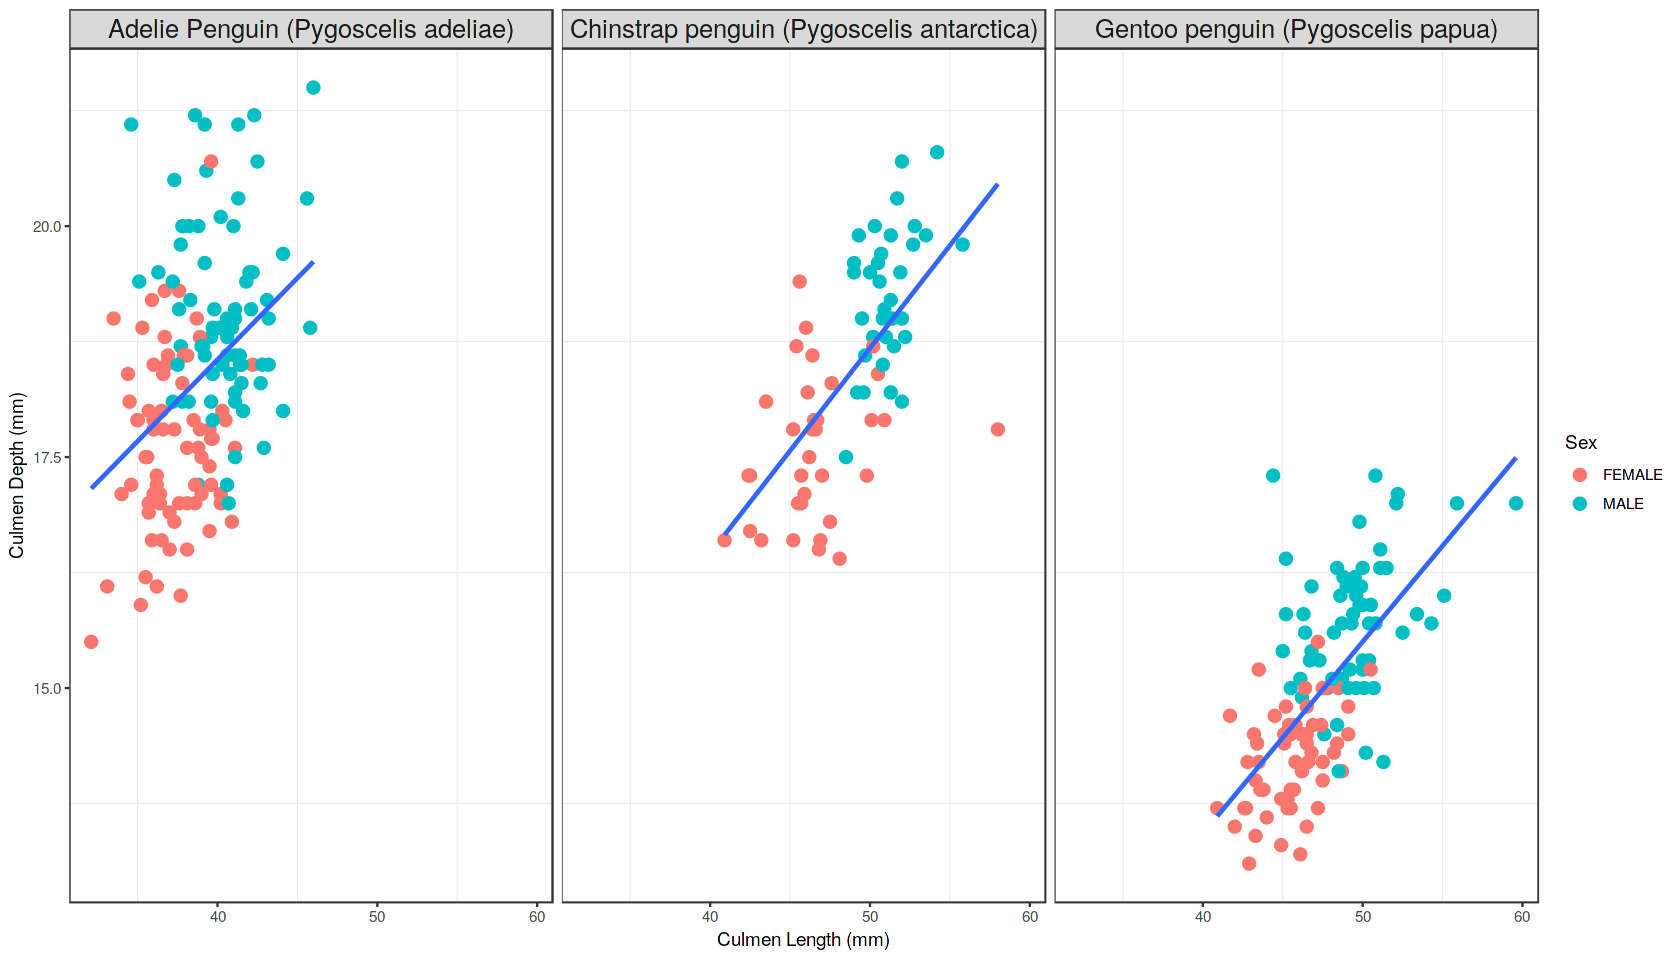

In [12]:
penguins %>%
    filter(Sex == 'FEMALE' | Sex == 'MALE' ) %>%         #Filter out null and NA values for Sex
    ggplot( aes(x=`Culmen Length (mm)`,y=`Culmen Depth (mm)`, color = Sex))+
    geom_point(size=3)+
    geom_smooth(method = "lm", 
             se = FALSE, 
             inherit.aes=FALSE,                         #The trendline is for all sexes
             aes(x=`Culmen Length (mm)`,y=`Culmen Depth (mm)`))+
    facet_wrap(~Species)+
    theme_bw() + 
    theme(panel.grid.major = element_blank(),            #Make background white
         strip.text = element_text(size=15))

# Correlation

In [13]:
penguins_cor <- penguins %>%
                select(`Culmen Length (mm)` ,`Culmen Depth (mm)`,`Flipper Length (mm)`,`Body Mass (g)`) %>%
                drop_na() %>%
                cor() %>%
                round(2)

penguins_cor

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.00,-0.24,0.66,0.60
Culmen Depth (mm),-0.24,1.00,-0.58,-0.47
Flipper Length (mm),0.66,-0.58,1.00,0.87
Body Mass (g),0.60,-0.47,0.87,1.00


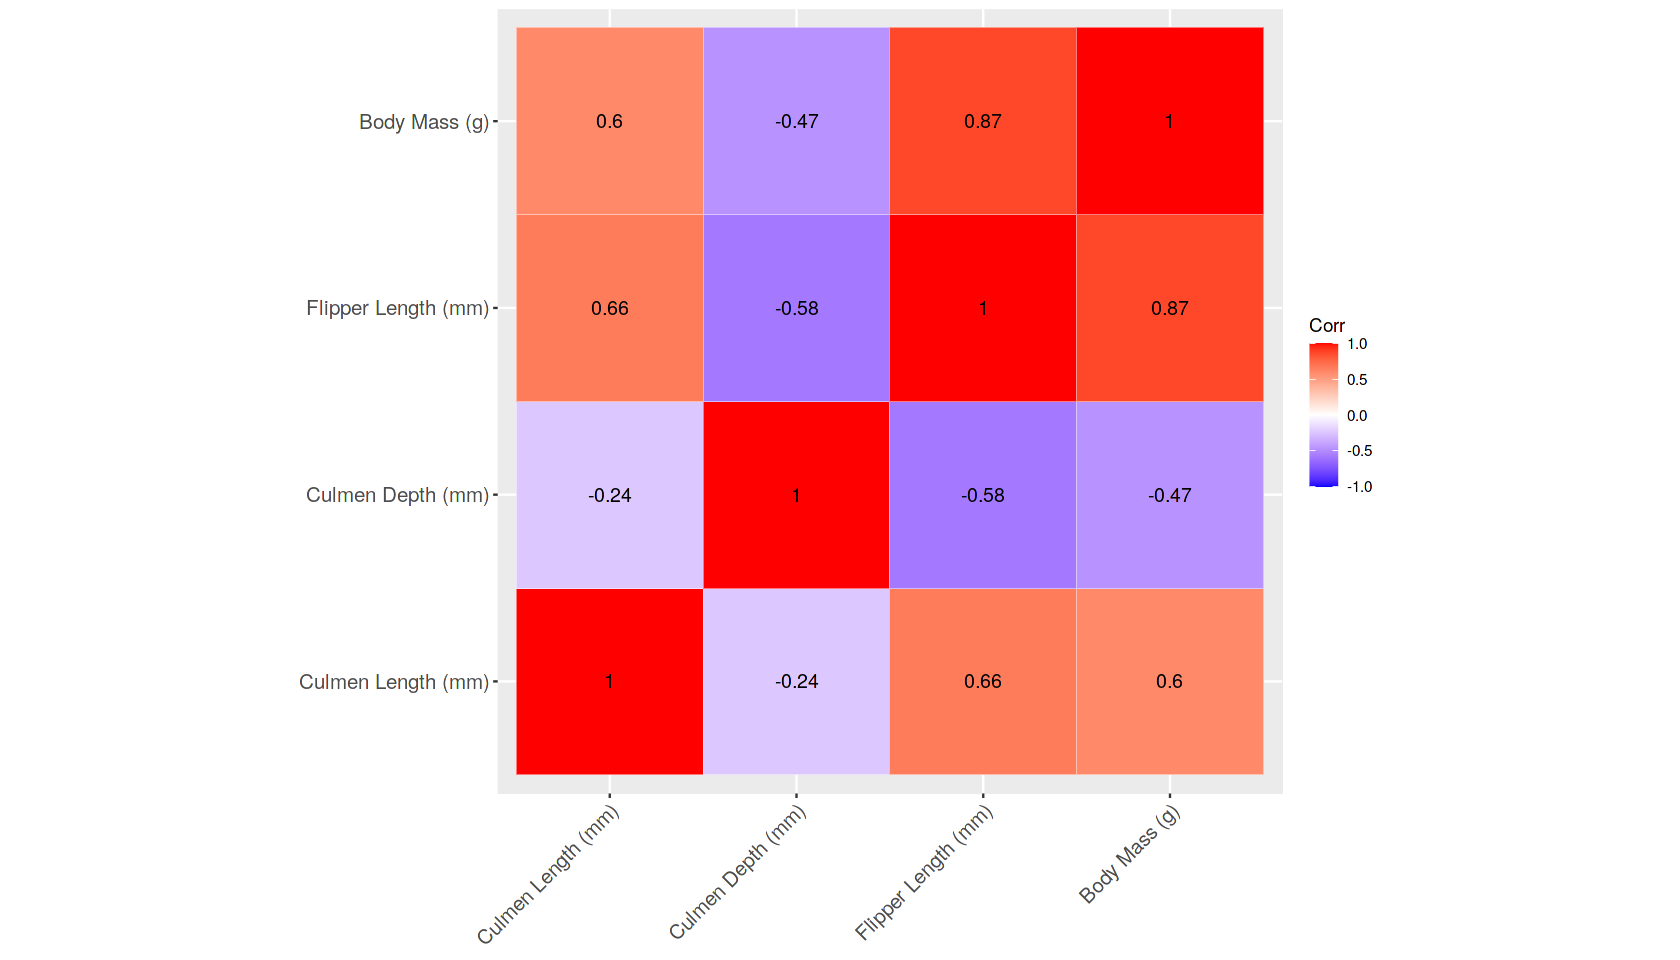

In [14]:
ggcorrplot(penguins_cor,
           outline.col = "white",
           ggtheme = ggplot2::theme_gray,
           colors = c("blue", "white", "red"),
           lab = TRUE)

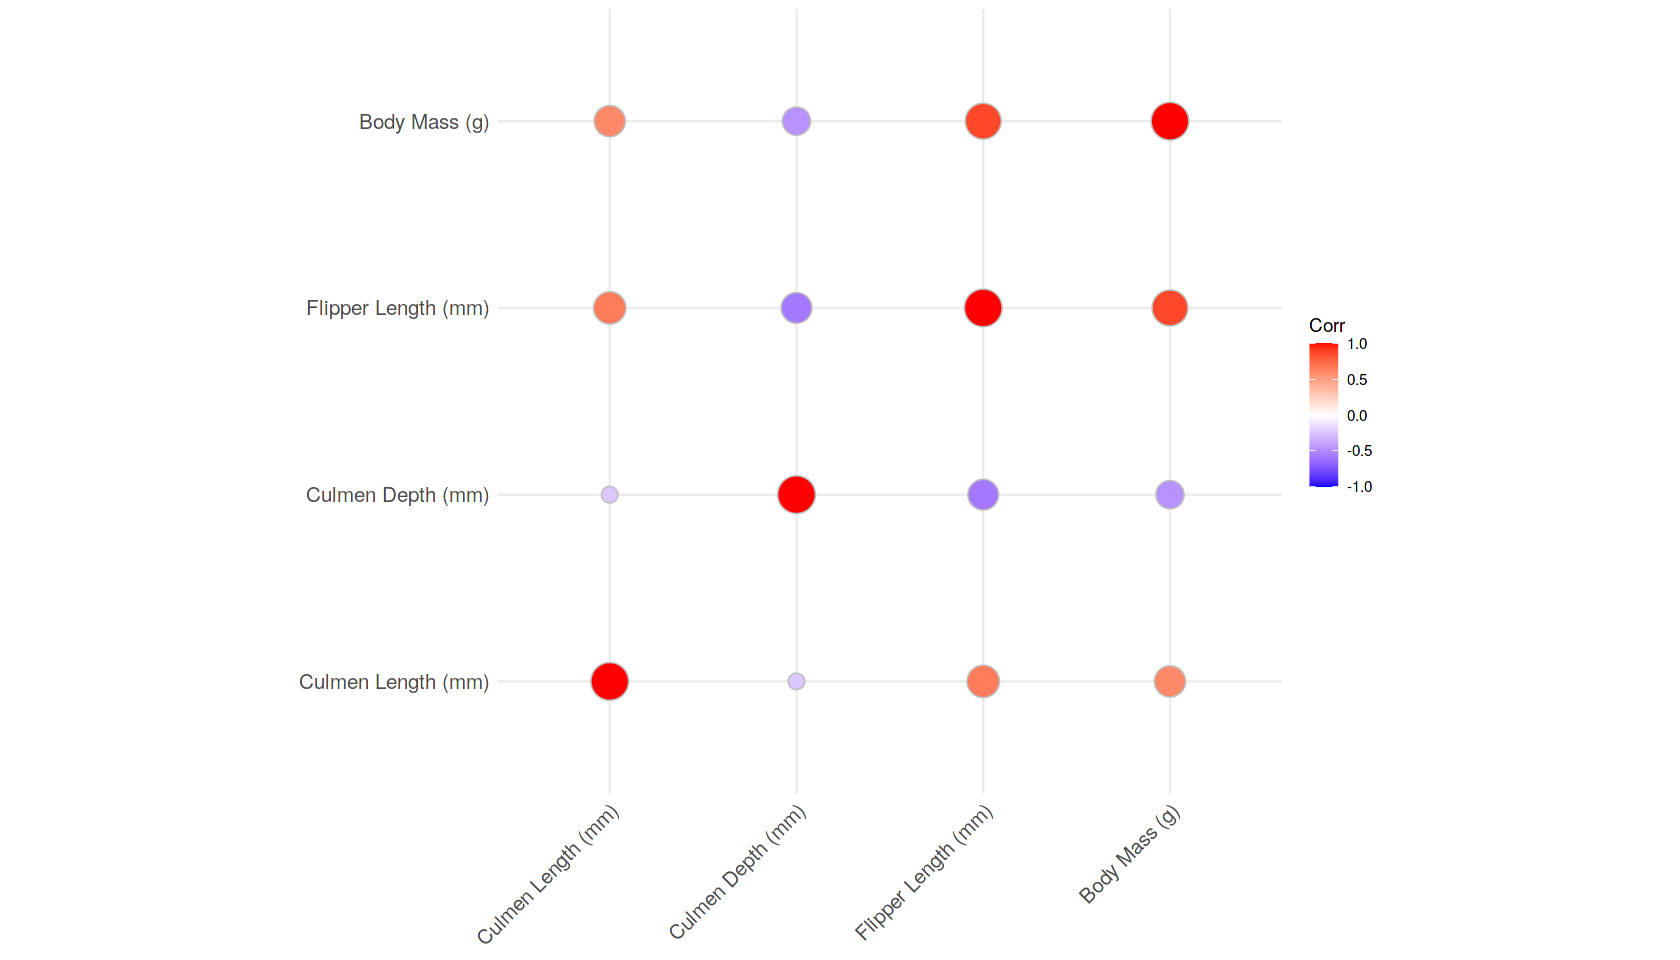

In [15]:
ggcorrplot(penguins_cor, method = "circle")

# Conclusion
As a first-time R and ggplot2 explorer, I've used various plots to:
* explore the data using histograms, density plots
* find correlations using scatter plots
* plot correlations tidily